## Time Series Analysis: Granger Causality








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setting Up**: Import Needed Libraries and Set DataFrame Display

In [ ]:
import io,pandas as pd,numpy as np,matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
from functools import reduce
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

%matplotlib inline


from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller

**Upload the Datasets for each News Topic**

In [ ]:
from google.colab import files

# inflation = "./filtered_datasets/inflation_tally.csv"
# economy = "./filtered_datasets/economy_tally.csv"
# politics = "./filtered_datasets/politics_tally.csv"
# technology = "./filtered_datasets/technology_tally.csv"
# environment = "./filtered_datasets/environment_tally.csv"
# health = "./filtered_datasets/health_tally.csv"
# business = "./filtered_datasets/business_tally.csv"
# foreign_affairs = "./filtered_datasets/foreign_affairs_tally.csv"
# welfare = "./filtered_datasets/welfare_tally.csv"

inflation = "/content/drive/My Drive/filtered_datasets/inflation_tally.csv"
economy = "/content/drive/My Drive/filtered_datasets/economy_tally.csv"
politics = "/content/drive/My Drive/filtered_datasets/politics_tally.csv"
technology = "/content/drive/My Drive/filtered_datasets/technology_tally.csv"
environment = "/content/drive/My Drive/filtered_datasets/environment_tally.csv"
health = "/content/drive/My Drive/filtered_datasets/health_tally.csv"
business = "/content/drive/My Drive/filtered_datasets/business_tally.csv"
foreign_affairs = "/content/drive/My Drive/filtered_datasets/foreign_affairs_tally.csv"
welfare = "/content/drive/My Drive/filtered_datasets/welfare_tally.csv"

## PreProcessing

**Convert Month Name to Corresponding Integer**<br>

**Read and Label Each News Columns to corresponding topic by adding a suffix of the topic name**<br>
ex: rappler_inflation



In [ ]:
#Step 6: Create a mapping functions to convert the month name into corresponding integer
month = {"January":1,"February":2,"March":3,"April":4}

#Step 7: Read each uploaded file into dataframes, add suffix depending on which tally, and map the months, create a new column called year, and create date stamp
df1 = pd.read_csv(inflation)
df1 = df1.add_suffix('_inflation')
df1.Month_inflation = df1.Month_inflation.map(month)
df1['Year_inflation']=int('2024')
df1 = df1.dropna()
df1 = df1.astype("int64")
df1['Date'] = df1.apply(lambda row: datetime(row['Year_inflation'], row['Month_inflation'], row['Day_inflation']), axis=1)

df2 = pd.read_csv(economy)
df2 = df2.add_suffix('_economy')
df2.Month_economy = df2.Month_economy.map(month)
df2['Year_economy']=int('2024')
df2 = df2.dropna()
df2 = df2.astype("int64")
df2['Date'] = df2.apply(lambda row: datetime(row['Year_economy'], row['Month_economy'], row['Day_economy']), axis=1)


df3 = pd.read_csv(politics)
df3 = df3.add_suffix('_politics')
df3['Month_politics'] = df3['Month_politics'].map(month)
df3['Year_politics'] = int('2024')
df3 = df3.dropna()
df3 = df3.astype("int64")
df3['Date'] = df3.apply(lambda row: datetime(row['Year_politics'], row['Month_politics'], row['Day_politics']), axis=1)


df4 = pd.read_csv(technology)
df4 = df4.add_suffix('_technology')
df4['Month_technology'] = df4['Month_technology'].map(month)
df4['Year_technology'] = int('2024')
df4 = df4.dropna()
df4 = df4.astype("int64")
df4['Date'] = df4.apply(lambda row: datetime(row['Year_technology'], row['Month_technology'], row['Day_technology']), axis=1)


df5 = pd.read_csv(environment)
df5 = df5.add_suffix('_environment')
df5['Month_environment'] = df5['Month_environment'].map(month)
df5['Year_environment'] = int('2024')
df5 = df5.dropna()
df5 = df5.astype("int64")
df5['Date'] = df5.apply(lambda row: datetime(row['Year_environment'], row['Month_environment'], row['Day_environment']), axis=1)


df6 = pd.read_csv(health)
df6 = df6.add_suffix('_health')
df6['Month_health'] = df6['Month_health'].map(month)
df6['Year_health'] = int('2024')
df6 = df6.dropna()
df6 = df6.astype("int64")
df6['Date'] = df6.apply(lambda row: datetime(row['Year_health'], row['Month_health'], row['Day_health']), axis=1)


df7 = pd.read_csv(business)
df7 = df7.add_suffix('_business')
df7['Month_business'] = df7['Month_business'].map(month)
df7['Year_business'] = int('2024')
df7 = df7.dropna()
df7 = df7.astype("int64")
df7['Date'] = df7.apply(lambda row: datetime(row['Year_business'], row['Month_business'], row['Day_business']), axis=1)


df8 = pd.read_csv(foreign_affairs)
df8 = df8.add_suffix('_foreign_affairs')
df8['Month_foreign_affairs'] = df8['Month_foreign_affairs'].map(month)
df8['Year_foreign_affairs'] = int('2024')
df8 = df8.dropna()
df8 = df8.astype("int64")
df8['Date'] = df8.apply(lambda row: datetime(row['Year_foreign_affairs'], row['Month_foreign_affairs'], row['Day_foreign_affairs']), axis=1)


df9 = pd.read_csv(welfare)
df9 = df9.add_suffix('_welfare')
df9['Month_welfare'] = df9['Month_welfare'].map(month)
df9['Year_welfare'] = int('2024')
df9 = df9.dropna()
df9 = df9.astype("int64")
df9['Date'] = df9.apply(lambda row: datetime(row['Year_welfare'], row['Month_welfare'], row['Day_welfare']), axis=1)


**Merge all DataFrames and check for number of nulls in each columns, delete the nulls, and set the Dates as the index of the rows**<br>
**Nulls occur because some dates are present on some of he Dataframes and not on other dataframes. Delete the nulls to have consistent dates**


In [ ]:
df = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [df1,df2,df3,df4,df5,df6,df7,df8, df9])
print(df.isnull().sum())
df = df.dropna()
df.set_index('Date',inplace=True)
df

Month_inflation                    0
Day_inflation                      0
Inquirer.net_inflation             0
Manila Bulletin_inflation          0
The Asian Journal USA_inflation    0
                                  ..
PTV News_welfare                   0
Mindanao Times_welfare             0
PhilNews.XYZ_welfare               0
Northern Dispatch_welfare          0
Year_welfare                       0
Length: 316, dtype: int64


,Month_inflation,Day_inflation,Inquirer.net_inflation,Manila Bulletin_inflation,The Asian Journal USA_inflation,The Manila Times_inflation,Business World_inflation,Eagle News_inflation,Metro Cebu News_inflation,Tempo_inflation,Abante Tonite_inflation,Philippine News Agency_inflation,InterAksyon_inflation,Business Mirror_inflation,The Summit Express_inflation,Our Daily News Online_inflation,Current PH_inflation,SunStar Philippines_inflation,Rappler_inflation,The Bohol Chronicle_inflation,Baguio Midland Courier_inflation,GMA News Online_inflation,Cebu Daily News_inflation,ABS-CBN News_inflation,Philstar.com_inflation,Manila Standard_inflation,Daily Tribune_inflation,Davao Today_inflation,Sunday Punch_inflation,Visayan Daily Star_inflation,PTV News_inflation,Mindanao Times_inflation,PhilNews.XYZ_inflation,Northern Dispatch_inflation,Year_inflation,Month_economy,Day_economy,Inquirer.net_economy,Manila Bulletin_economy,The Asian Journal USA_economy,The Manila Times_economy,Business World_economy,Eagle News_economy,Metro Cebu News_economy,Tempo_economy,Abante Tonite_economy,Philippine News Agency_economy,InterAksyon_economy,Business Mirror_economy,The Summit Express_economy,Our Daily News Online_economy,Current PH_economy,SunStar Philippines_economy,Rappler_economy,The Bohol Chronicle_economy,Baguio Midland Courier_economy,GMA News Online_economy,Cebu Daily News_economy,ABS-CBN News_economy,Philstar.com_economy,Manila Standard_economy,Daily Tribune_economy,Davao Today_economy,Sunday Punch_economy,Visayan Daily Star_economy,PTV News_economy,Mindanao Times_economy,PhilNews.XYZ_economy,Northern Dispatch_economy,Year_economy,Month_politics,Day_politics,Inquirer.net_politics,Manila Bulletin_politics,The Asian Journal USA_politics,The Manila Times_politics,Business World_politics,Eagle News_politics,Metro Cebu News_politics,Tempo_politics,Abante Tonite_politics,Philippine News Agency_politics,InterAksyon_politics,Business Mirror_politics,The Summit Express_politics,Our Daily News Online_politics,Current PH_politics,SunStar Philippines_politics,Rappler_politics,The Bohol Chronicle_politics,Baguio Midland Courier_politics,GMA News Online_politics,Cebu Daily News_politics,ABS-CBN News_politics,Philstar.com_politics,Manila Standard_politics,Daily Tribune_politics,Davao Today_politics,Sunday Punch_politics,Visayan Daily Star_politics,PTV News_politics,Mindanao Times_politics,PhilNews.XYZ_politics,Northern Dispatch_politics,Year_politics,Month_technology,Day_technology,Inquirer.net_technology,Manila Bulletin_technology,The Asian Journal USA_technology,The Manila Times_technology,Business World_technology,Eagle News_technology,Metro Cebu News_technology,Tempo_technology,Abante Tonite_technology,Philippine News Agency_technology,InterAksyon_technology,Business Mirror_technology,The Summit Express_technology,Our Daily News Online_technology,Current PH_technology,SunStar Philippines_technology,Rappler_technology,The Bohol Chronicle_technology,Baguio Midland Courier_technology,GMA News Online_technology,Cebu Daily News_technology,ABS-CBN News_technology,Philstar.com_technology,Manila Standard_technology,Daily Tribune_technology,Davao Today_technology,Sunday Punch_technology,Visayan Daily Star_technology,PTV News_technology,Mindanao Times_technology,PhilNews.XYZ_technology,Northern Dispatch_technology,Year_technology,Month_environment,Day_environment,Inquirer.net_environment,Manila Bulletin_environment,The Asian Journal USA_environment,The Manila Times_environment,Business World_environment,Eagle News_environment,Metro Cebu News_environment,Tempo_environment,Abante Tonite_environment,Philippine News Agency_environment,InterAksyon_environment,Business Mirror_environment,The Summit Express_environment,Our Daily News Online_environment,Current PH_environment,SunStar Philippines_environment,Rappler_environment,The Bohol Chronicle_environment,Baguio Midland Courier_environment,GMA News Online_environment,Cebu Daily News_environment,ABS-CBN News_environmen

In [ ]:
# Step 1: Verify the columns in your DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Step 2: Calculate which columns have more than 50% zeros
zero_columns = df.columns[(df == 0).mean() > 0.50]

# Step 3: Identify columns that contain "Month", "Day", or "Year"
date_columns = df.columns[df.columns.str.contains('Month|Day|Year')]

# Step 4: Combine columns to be dropped
columns_to_drop = zero_columns.union(date_columns)

# Step 5: Drop those columns
df = df.drop(columns=columns_to_drop, axis=1)

# Print the updated DataFrame to confirm
df.head()

Columns in the DataFrame: ['Month_inflation', 'Day_inflation', 'Inquirer.net_inflation', 'Manila Bulletin_inflation', 'The Asian Journal USA_inflation', 'The Manila Times_inflation', 'Business World_inflation', 'Eagle News_inflation', 'Metro Cebu News_inflation', 'Tempo_inflation', 'Abante Tonite_inflation', 'Philippine News Agency_inflation', 'InterAksyon_inflation', 'Business Mirror_inflation', 'The Summit Express_inflation', 'Our Daily News Online_inflation', 'Current PH_inflation', 'SunStar Philippines_inflation', 'Rappler_inflation', 'The Bohol Chronicle_inflation', 'Baguio Midland Courier_inflation', 'GMA News Online_inflation', 'Cebu Daily News_inflation', 'ABS-CBN News_inflation', 'Philstar.com_inflation', 'Manila Standard_inflation', 'Daily Tribune_inflation', 'Davao Today_inflation', 'Sunday Punch_inflation', 'Visayan Daily Star_inflation', 'PTV News_inflation', 'Mindanao Times_inflation', 'PhilNews.XYZ_inflation', 'Northern Dispatch_inflation', 'Year_inflation', 'Month_econo

,The Manila Times_inflation,Business World_inflation,Business Mirror_inflation,SunStar Philippines_inflation,GMA News Online_inflation,ABS-CBN News_inflation,Philstar.com_inflation,Manila Standard_inflation,Daily Tribune_inflation,The Manila Times_economy,Business World_economy,Business Mirror_economy,SunStar Philippines_economy,Rappler_economy,GMA News Online_economy,ABS-CBN News_economy,Philstar.com_economy,Manila Standard_economy,Daily Tribune_economy,The Manila Times_politics,Business World_politics,Business Mirror_politics,SunStar Philippines_politics,Rappler_politics,GMA News Online_politics,ABS-CBN News_politics,Philstar.com_politics,Manila Standard_politics,Daily Tribune_politics,The Manila Times_technology,Business World_technology,Business Mirror_technology,SunStar Philippines_technology,Rappler_technology,GMA News Online_technology,Cebu Daily News_technology,ABS-CBN News_technology,Philstar.com_technology,Manila Standard_technology,Daily Tribune_technology,The Manila Times_environment,Business World_environment,Business Mirror_environment,SunStar Philippines_environment,Rappler_environment,GMA News Online_environment,Cebu Daily News_environment,ABS-CBN News_environment,Philstar.com_environment,Manila Standard_environment,Daily Tribune_environment,The Manila Times_health,Business World_health,Business Mirror_health,SunStar Philippines_health,Rappler_health,GMA News Online_health,Cebu Daily News_health,ABS-CBN News_health,Philstar.com_health,Manila Standard_health,Daily Tribune_health,The Manila Times_business,Business World_business,InterAksyon_business,Business Mirror_business,SunStar Philippines_business,Rappler_business,GMA News Online_business,Cebu Daily News_business,ABS-CBN News_business,Philstar.com_business,Manila Standard_business,Daily Tribune_business,The Manila Times_foreign_affairs,Business Mirror_foreign_affairs,Rappler_foreign_affairs,GMA News Online_foreign_affairs,ABS-CBN News_foreign_affairs,Philstar.com_foreign_affairs,Manila Standard_foreign_affairs,Daily Tribune_foreign_affairs,The Manila Times_welfare,Business World_welfare,Business Mirror_welfare,SunStar Philippines_welfare,Rappler_welfare,GMA News Online_welfare,Cebu Daily News_welfare,ABS-CBN News_welfare,Philstar.com_welfare,Manila Standard_welfare,Daily Tribune_welfare
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-01,8,3,4,1,1,0,7,4,4,3,4,8,3,1,1,2,8,10,9,3,4,8,3,1,1,2,8,10,9,3,4,8,3,1,1,0,2,8,10,9,7,2,8,4,0,1,1,0,9,10,5,7,2,8,4,0,1,1,0,9,10,5,19,2,1,9,5,0,5,0,2,11,7,8,2,2,0,0,0,1,2,2,1,1,3,2,1,2,0,2,8,3,8
2024-01-02,1,8,1,2,0,2,5,2,2,8,6,2,3,3,1,1,12,2,4,8,6,2,3,3,1,1,12,2,4,8,6,2,3,3,1,1,1,12,2,4,8,5,0,2,0,1,1,0,6,2,3,8,5,0,2,0,1,1,0,6,2,3,36,13,1,1,5,1,3,2,6,16,6,6,0,1,0,4,0,1,0,2,3,4,2,6,0,6,0,1,2,0,7
2024-01-03,10,6,10,3,2,1,8,3,2,30,5,10,5,3,1,2,6,2,5,30,5,10,5,3,1,2,6,2,5,30,5,10,5,3,1,0,2,6,2,5,35,3,10,6,1,3,0,1,10,3,2,35,3,10,6,1,3,0,1,10,3,2,147,15,1,21,12,5,4,1,4,18,8,3,1,0,0,0,0,2,2,2,1,2,5,5,1,1,1,5,5,6,4
2024-01-04,12,8,2,1,1,1,4,3,2,24,5,5,4,3,4,2,6,9,4,24,5,5,4,3,4,2,6,9,4,24,5,5,4,3,4,1,2,6,9,4,52,4,6,4,2,2,1,2,9,7,6,52,4,6,4,2,2,1,2,9,7,6,201,8,2,11,12,4,4,0,6,22,13,7,0,0,1,4,1,0,1,1,3,2,7,6,1,0,0,2,5,1,5
2024-01-05,16,6,5,2,3,5,6,3,7,34,9,11,4,2,0,1,4,1,9,34,9,11,4,2,0,1,4,1,9,34,9,11,4,2,0,0,1,4,1,9,67,3,8,8,2,0,0,0,8,3,7,67,3,8,8,2,0,0,0,8,3,7,220,8,1,13,12,5,4,2,1,22,5,17,3,2,3,1,1,4,1,2,4,0,5,1,0,2,1,1,3,6,4


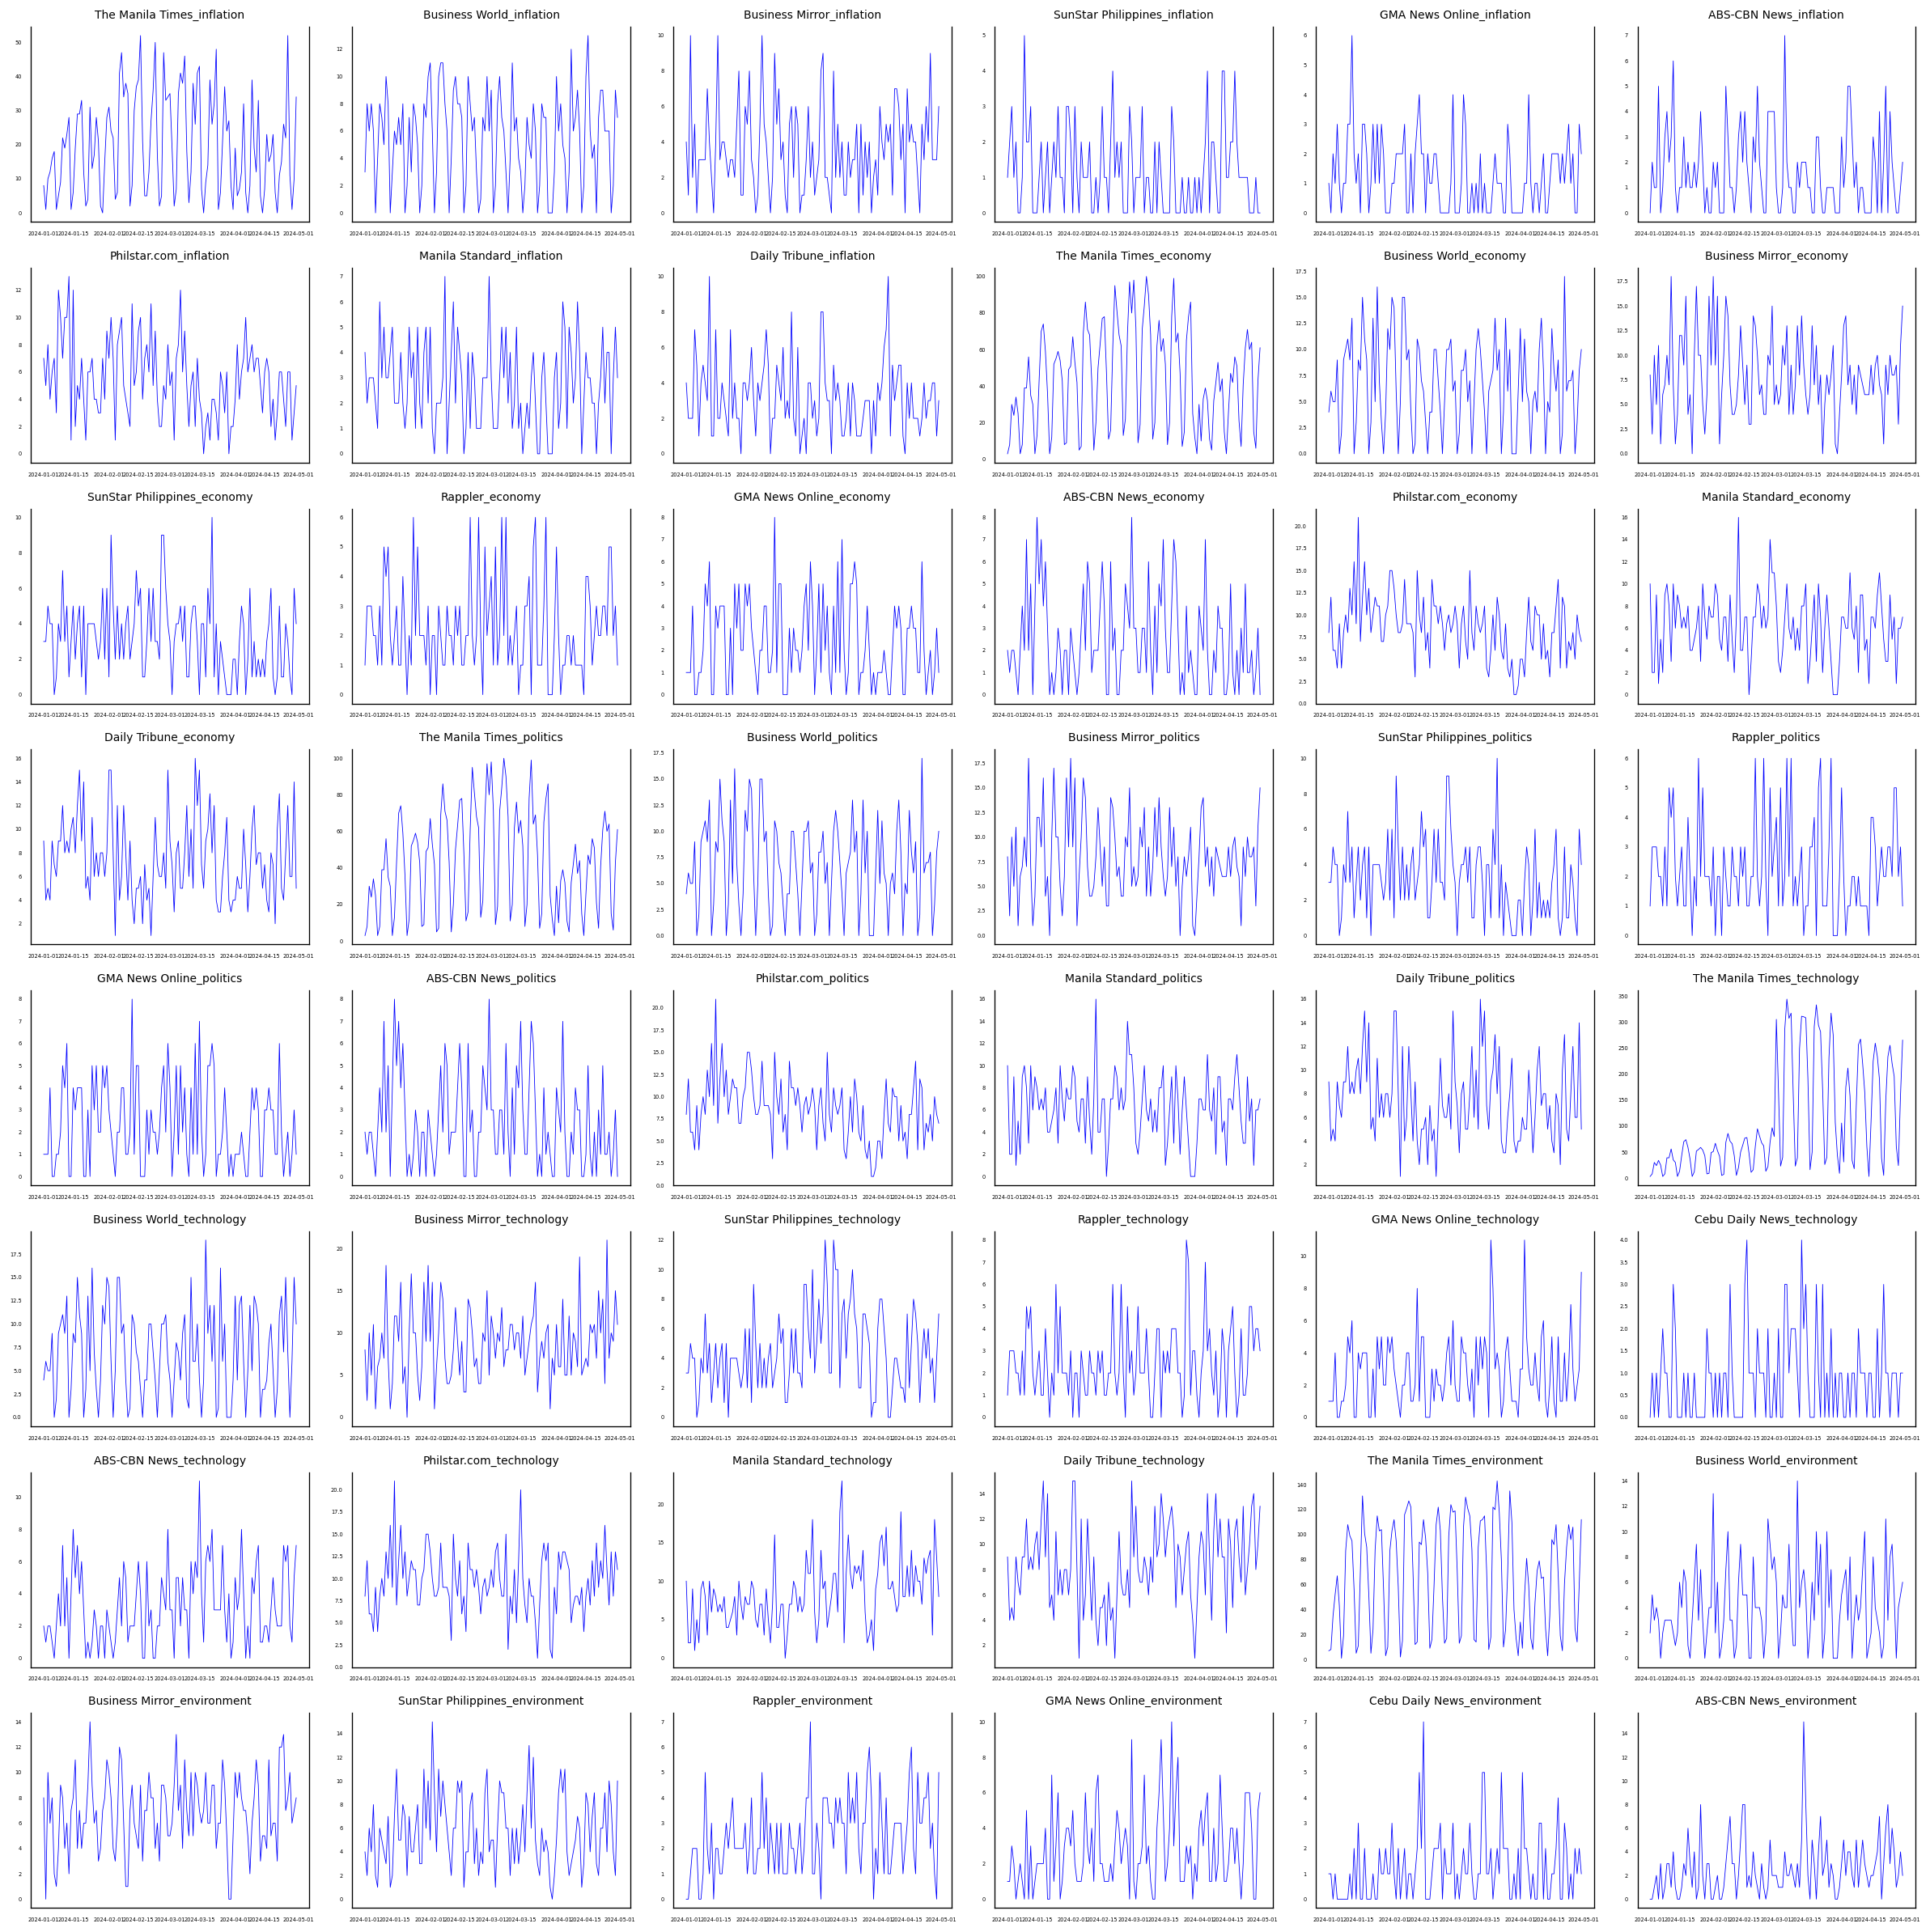

In [ ]:
# Step 10: Visualize the series
fig, axes = plt.subplots(nrows=8, ncols=6, dpi=120, figsize=(20,20))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=4)

plt.tight_layout();

In [ ]:
df_numeric = df.select_dtypes(include=[np.number]).reset_index(drop=True)

# Optionally drop rows with missing values
df_clean = df_numeric.dropna()

inf_features = ['Cebu Daily News_environment', 'Business World_environment',
                'SunStar Philippines_politics', 'Rappler_politics', 'GMA News Online_politics']
correlation = df_clean[inf_features].corr()
print(correlation)

# Add constant column for intercept
X = sm.add_constant(df_clean)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns  # Use numeric columns only

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
high_correlation = vif_data.loc[vif_data.VIF>=5]
high_correlation = high_correlation
high_correlation = list(high_correlation.Feature)
high_correlation.remove('const')
# "high_correlation"

print(vif_data.sort_values("VIF", ascending=False))

                              Cebu Daily News_environment  Business World_environment  SunStar Philippines_politics  Rappler_politics  GMA News Online_politics
Cebu Daily News_environment                      1.000000                    0.192712                      0.065645         -0.079884                  0.185998
Business World_environment                       0.192712                    1.000000                      0.368037          0.003311                  0.420970
SunStar Philippines_politics                     0.065645                    0.368037                      1.000000          0.193946                  0.369164
Rappler_politics                                -0.079884                    0.003311                      0.193946          1.000000                  0.286632
GMA News Online_politics                         0.185998                    0.420970                      0.369164          0.286632                  1.000000


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          Feature       VIF
47    Cebu Daily News_environment       inf
42     Business World_environment       inf
23   SunStar Philippines_politics       inf
24               Rappler_politics       inf
25       GMA News Online_politics       inf
..                            ...       ...
4   SunStar Philippines_inflation  2.751907
90           ABS-CBN News_welfare  2.367740
87                Rappler_welfare  2.288164
77        Rappler_foreign_affairs  2.274493
89        Cebu Daily News_welfare  2.188182

[94 rows x 2 columns]


In [ ]:
df = df.drop(columns=high_correlation)
df = df.loc[:,~df.columns.duplicated()]
print(list(df))

['Business Mirror_inflation', 'SunStar Philippines_inflation', 'GMA News Online_inflation', 'ABS-CBN News_inflation', 'Philstar.com_inflation', 'Manila Standard_inflation', 'Daily Tribune_inflation', 'Rappler_economy', 'Business Mirror_technology', 'Rappler_technology', 'Cebu Daily News_technology', 'Philstar.com_technology', 'Manila Standard_technology', 'Business Mirror_environment', 'SunStar Philippines_environment', 'Rappler_environment', 'Cebu Daily News_environment', 'ABS-CBN News_environment', 'Philstar.com_environment', 'Manila Standard_environment', 'Daily Tribune_environment', 'InterAksyon_business', 'Rappler_business', 'Cebu Daily News_business', 'ABS-CBN News_business', 'The Manila Times_foreign_affairs', 'Business Mirror_foreign_affairs', 'Rappler_foreign_affairs', 'GMA News Online_foreign_affairs', 'ABS-CBN News_foreign_affairs', 'Philstar.com_foreign_affairs', 'Manila Standard_foreign_affairs', 'Daily Tribune_foreign_affairs', 'Business World_welfare', 'Business Mirror_w

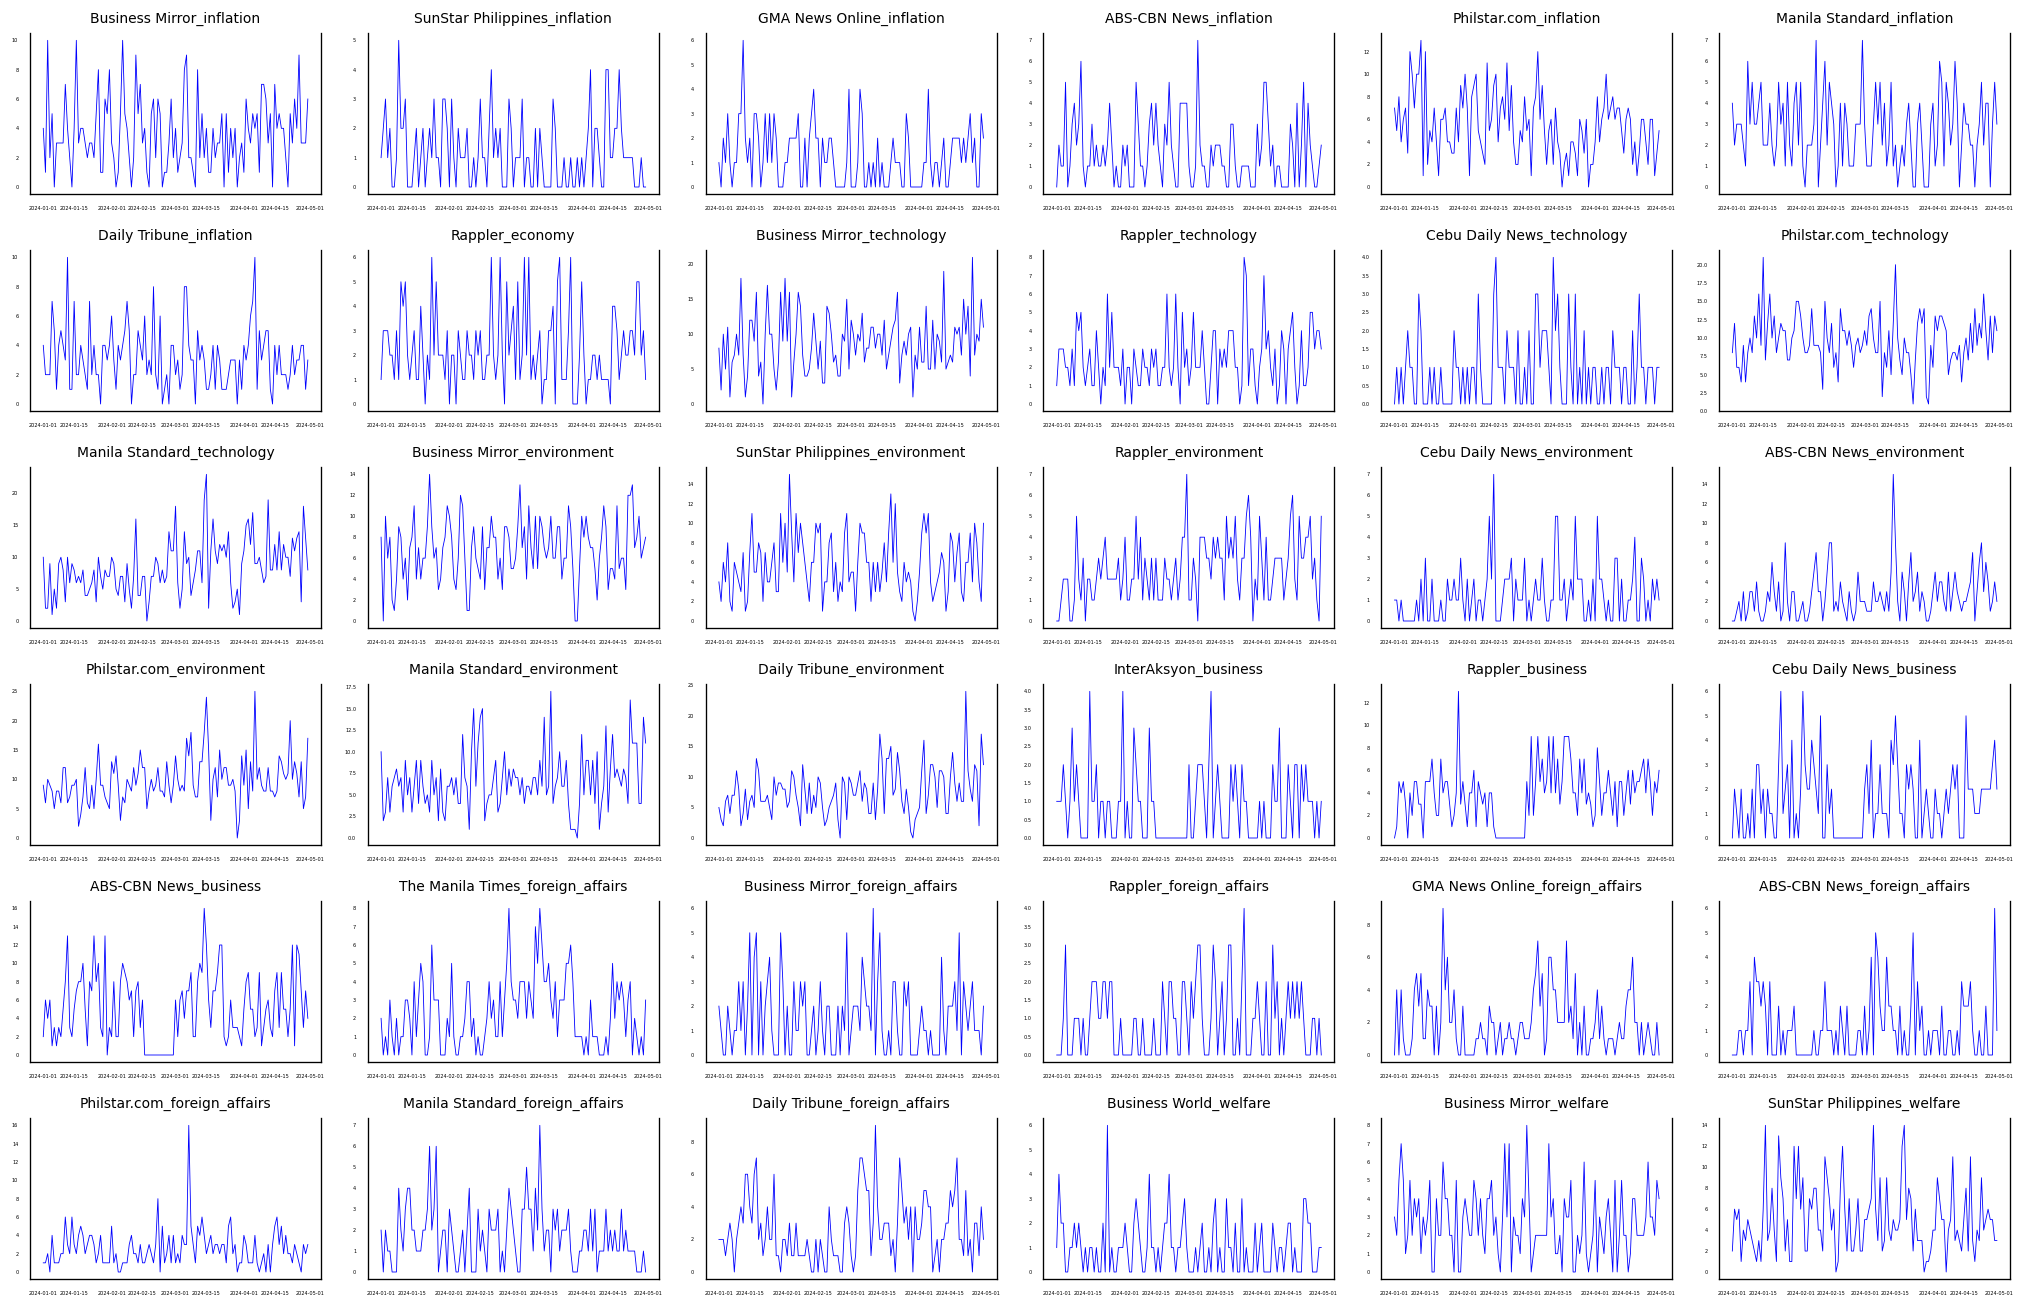

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
from tabulate import tabulate

def adfuller_test(series, signif=0.05, name='', verbose=False):

    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue']
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        status = 'stationary'
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        status = 'non-stationary'
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

    return {'name': name, 'p_value': p_value, 'status': status}



def create_table(data, title):
    if data:
        table = tabulate(data, headers="keys", tablefmt="grid").split('\n')
        table.insert(0, f'{title}:')
        return table
    else:
        return [f'{title}: No data available.']


In [ ]:
#Step 14: Determine if there is none stationary time series
non_stationary_ts = []
stationary_ts = []

for name, column in df.items():
    result = adfuller_test(column, name=column.name)
    if result['status'] == 'stationary':
        stationary_ts.append(result)
    else:
        non_stationary_ts.append(result)
    print('\n')

    Augmented Dickey-Fuller Test on "Business Mirror_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.3733
 No. Lags Chosen       = 6
 Critical value 1%     = -3.489
 Critical value 5%     = -2.887
 Critical value 10%    = -2.58
 => P-Value = 0.0119. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SunStar Philippines_inflation" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.275
 No. Lags Chosen       = 0
 Critical value 1%     = -3.486
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "GMA News Online_inflation" 
    -----------------------------------------------
 Null Hypothesis:

    Augmented Dickey-Fuller Test on "GMA News Online_foreign_affairs" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.987
 No. Lags Chosen       = 1
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ABS-CBN News_foreign_affairs" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.4416
 No. Lags Chosen       = 1
 Critical value 1%     = -3.487
 Critical value 5%     = -2.886
 Critical value 10%    = -2.58
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Philstar.com_foreign_affairs" 
    -----------------------------------------------
 Null Hypoth

In [ ]:
# Create tables for both datasets
print("significant value: 0.5")
print("non-stationary: > 0.5")
print("stationary: < 0.5 \n")

stationary_table = create_table(stationary_ts, "Stationary time series")
non_stationary_table = create_table(non_stationary_ts, "Non-stationary time series")

# Combine the tables side by side
max_len = max(len(stationary_table), len(non_stationary_table))
stationary_table.extend([''] * (max_len - len(stationary_table)))
non_stationary_table.extend([''] * (max_len - len(non_stationary_table)))

combined_table = [f'{st:<60} | {ns}' for st, ns in zip(stationary_table, non_stationary_table)]
print('\n'.join(combined_table))

significant value: 0.5
non-stationary: > 0.5
stationary: < 0.5 

Stationary time series:                                      | Non-stationary time series:
+----------------------------------+-----------+------------+ | +----------------------------+-----------+----------------+
| name                             |   p_value | status     | | | name                       |   p_value | status         |
+==================================+===========+============+ | +============================+===========+================+
| Business Mirror_inflation        |    0.0119 | stationary | | | Philstar.com_inflation     |    0.2314 | non-stationary |
+----------------------------------+-----------+------------+ | +----------------------------+-----------+----------------+
| SunStar Philippines_inflation    |    0      | stationary | | | Business Mirror_technology |    0.1123 | non-stationary |
+----------------------------------+-----------+------------+ | +----------------------------+------

In [ ]:
cols = ["Philstar.com_inflation","Business Mirror_technology","Rappler_business","Rappler_foreign_affairs"]
df_diff1 = df[cols]
df_differenced_1 = df_diff1.diff().dropna()
df_differenced_1

,Philstar.com_inflation,Business Mirror_technology,Rappler_business,Rappler_foreign_affairs
Date,,,,
2024-01-02,-2.0,-6.0,1.0,0.0
2024-01-03,3.0,8.0,4.0,0.0
2024-01-04,-4.0,-5.0,-1.0,1.0
2024-01-05,2.0,6.0,1.0,2.0
2024-01-06,1.0,-10.0,-2.0,-3.0
...,...,...,...,...
2024-04-26,4.0,-14.0,-2.0,1.0
2024-04-27,0.0,3.0,-3.0,0.0
2024-04-28,-5.0,-1.0,3.0,-1.0


In [ ]:
df1 = df.drop(columns = cols)
df2 = pd.merge(df1, df_differenced_1, left_index=True, right_index=True)
df2 = df2.fillna(0)

In [ ]:
cols_drop = []
drop_cols = df2.columns[(df2 == 0).sum() > 0.50*df2.shape[1]]
for i in drop_cols:
  cols_drop.append(str(i))
print(cols_drop)
df3 = df2.drop(columns = drop_cols, axis = 1)
df3

['Business Mirror_inflation', 'Manila Standard_inflation', 'Rappler_economy', 'Rappler_technology', 'ABS-CBN News_business', 'Daily Tribune_foreign_affairs', 'Business Mirror_welfare']


,Daily Tribune_inflation,Philstar.com_technology,Manila Standard_technology,Business Mirror_environment,SunStar Philippines_environment,Rappler_environment,Philstar.com_environment,Manila Standard_environment,Daily Tribune_environment,Philstar.com_foreign_affairs,SunStar Philippines_welfare,Philstar.com_welfare,Manila Standard_welfare,Daily Tribune_welfare
Date,,,,,,,,,,,,,,
2024-01-01,4,8,10,8,4,0,9,10,5,1,2,8,3,8
2024-01-02,2,12,2,0,2,0,6,2,3,1,6,2,0,7
2024-01-03,2,6,2,10,6,1,10,3,2,2,5,5,6,4
2024-01-04,2,6,9,6,4,2,9,7,6,0,6,5,1,5
2024-01-05,7,4,1,8,8,2,8,3,7,4,1,3,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,3,7,14,8,10,2,7,11,12,1,6,8,6,9
2024-04-27,4,13,3,10,8,3,13,4,11,0,5,3,4,7
2024-04-28,4,8,18,6,4,1,5,4,2,3,5,10,0,8


In [ ]:
df_numeric = df3.select_dtypes(include=[np.number]).reset_index(drop=True)

# Optionally drop rows with missing values
df_clean = df_numeric.dropna()

# Add constant column for intercept
X = sm.add_constant(df_clean)

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns  # Use numeric columns only

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
high_correlation = vif_data.loc[vif_data.VIF>=5]
high_correlation = high_correlation
high_correlation = list(high_correlation.Feature)
high_correlation.remove('const')
high_correlation

[]

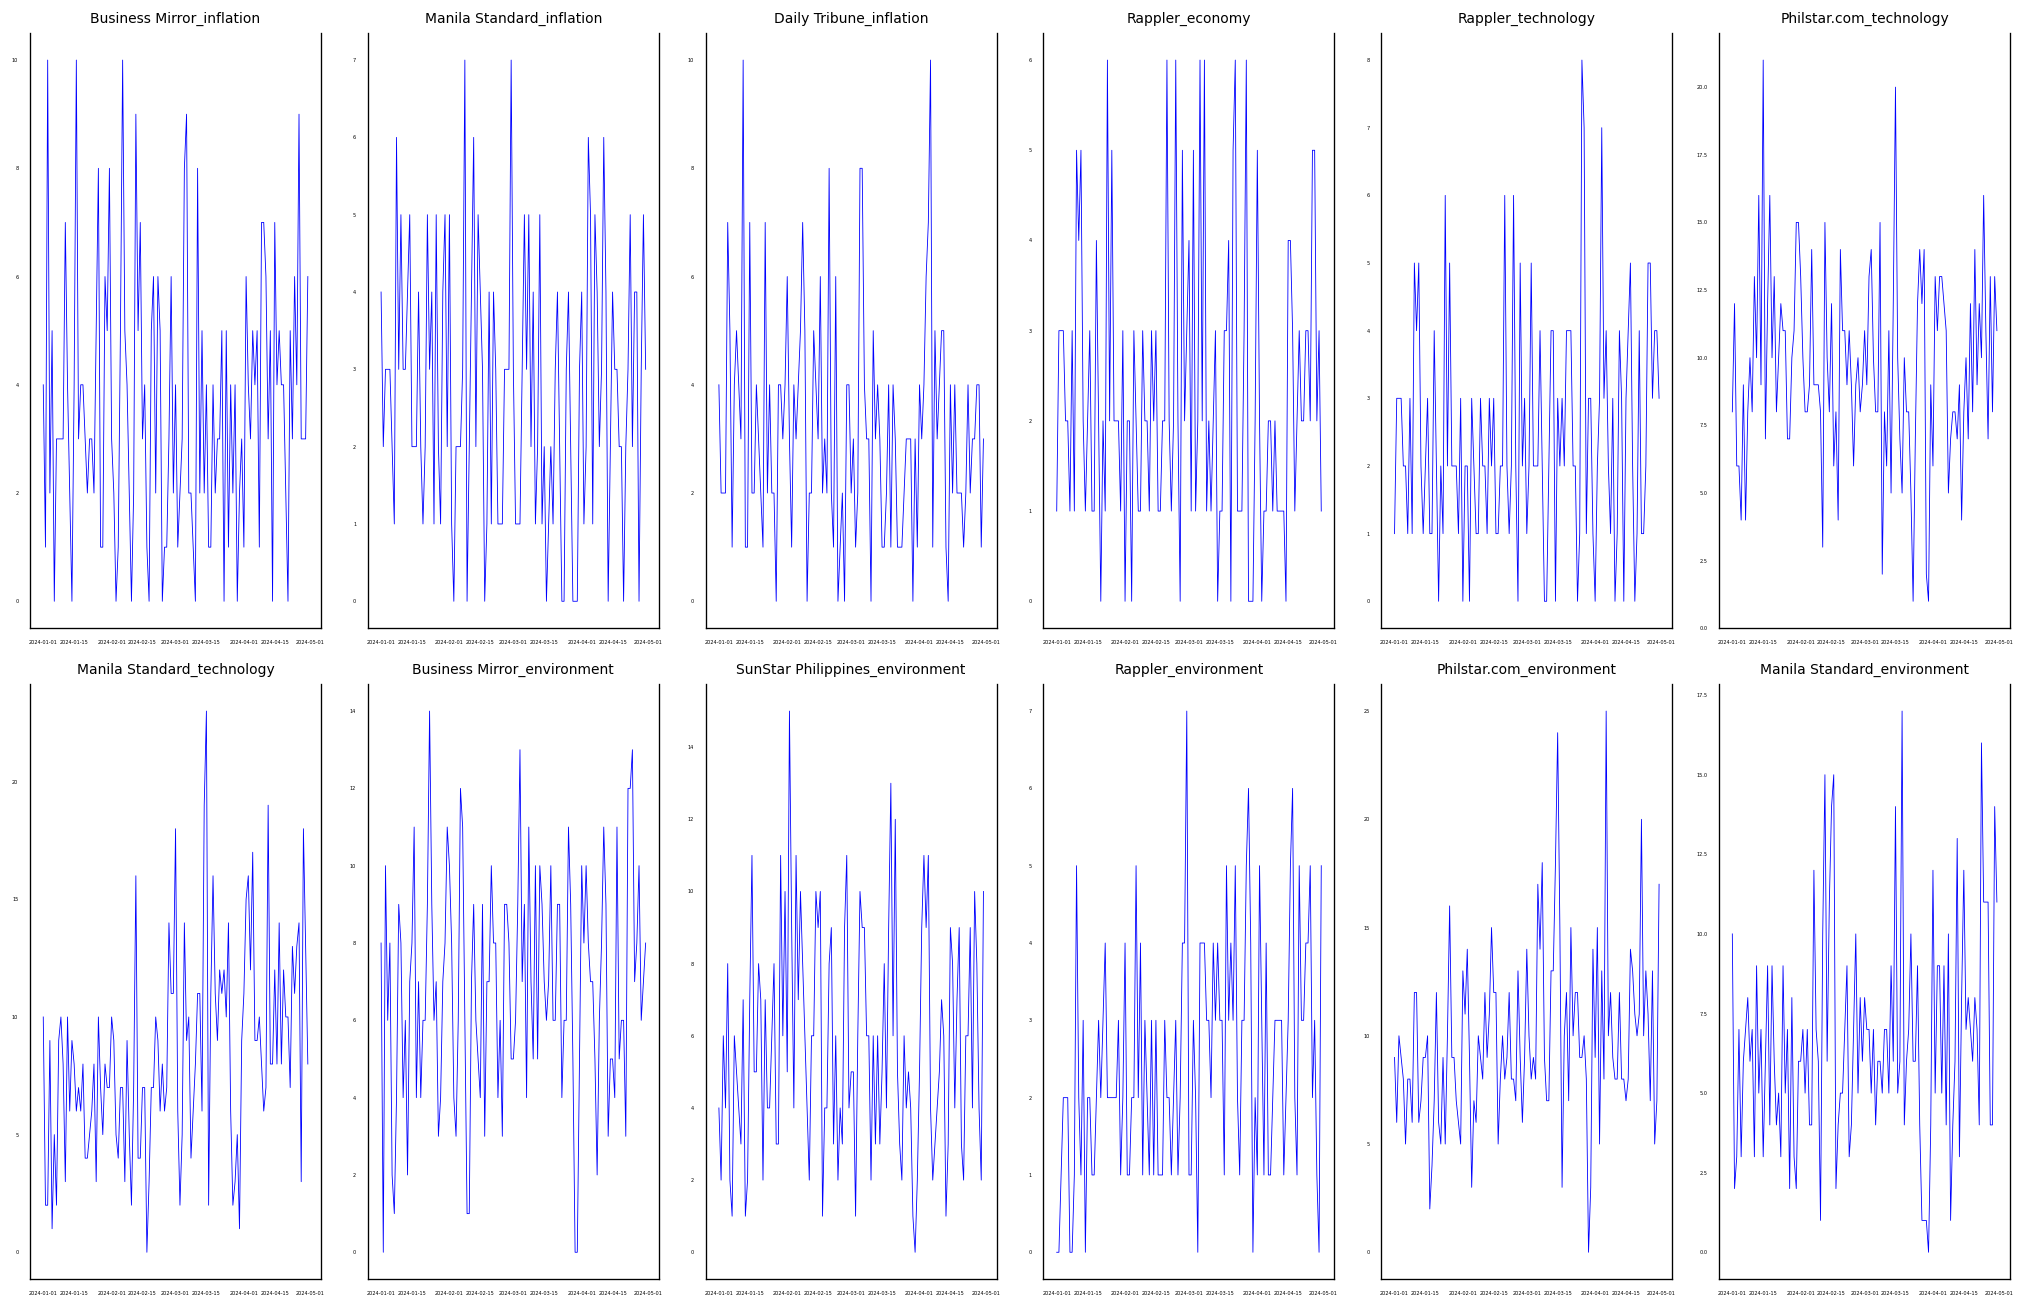

In [ ]:
# Step 12: Visualize the new series

fig, axes = plt.subplots(nrows=2, ncols=6, dpi=120, figsize=(17,11))
plt.rcParams.update({'axes.titlesize': 'small'})
for i, ax in enumerate(axes.flatten()):
    data = df2[df2.columns[i]]
    ax.plot(data, color='blue', linewidth=0.5)
    # Decorations
    ax.set_title(df2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=3)

plt.tight_layout();

In [ ]:
model = VAR(df3)

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
for i in [0,1,2,3,4,5,6,7]:
  try:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
  except:
    continue

Lag Order = 0
AIC :  27.42824760855334
BIC :  27.75172750639098
Lag Order = 1
AIC :  28.159067202841204
BIC :  33.03717775270978
Lag Order = 2
AIC :  28.951261471020224
BIC :  38.43297691810662
Lag Order = 3
AIC :  29.451063856154317
BIC :  43.5862515165639
Lag Order = 4
AIC :  29.563783705756258
BIC :  48.403226440530695
Lag Order = 5
AIC :  28.179158772625968
BIC :  51.7745781688305
Lag Order = 6
AIC :  23.85766711107887
BIC :  52.2617473958812
Lag Order = 7
AIC :  10.764802503748204
BIC :  44.03121521843918


In [ ]:
x = model.select_order(maxlags=7)
x.summary()

,AIC,BIC,FPE,HQIC
0,27.49,27.83*,8.718e+11,27.63
1,28.33,33.37,2.046e+12,30.37
2,29.10,38.84,5.078e+12,33.05
3,29.58,44.03,1.220e+13,35.45
4,29.70,48.85,3.135e+13,37.47
5,28.05,51.91,3.022e+13,37.73
6,23.62,52.18,7.960e+12,35.21
7,10.76*,44.03,1.766e+10*,24.27*


In [ ]:
#Step 13: Check Granger Causality of all possible combinations of the None-Stationary Time series.
#The rows are the response variable, columns are predictors. The values in the table are the P-Values.

maxlag=7
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

granger_matrix = grangers_causation_matrix(df3, variables = df3.columns)
granger_matrzix
#Interpretation:
#P-Values lesser than the significance level (0.05), implies the Null Hypothesis that the coefficients of the corresponding past values is zero, that is, the X does not cause Y can be rejected.
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).
#For example, P-Value of 0.4930 at (row 1, column 5) represents the p-value of the Grangers Causality test for Law 4_gma_x causing Law 4_abscbn_y,
# but since it is higher than the significance level of 0.05 we cannot reject the null hypothesis and we can say that Law 4_gma_x does not cause Law 4_abscbn_y.
#But the P-Value of 0.0000 at (row 5, column 1) represents the p-value of the Grangers Causality test for causing Law 4_abscbn_x causing Law 4_gma_y,
# since it is lesser than the significance level of 0.05 we reject the null hypothesis and we can say that Law 4_abscbn_x causing Law 4_gma_y.
#Looking at the P-Values in the table, there are some variables that are interchangeably causing each other.

,Business Mirror_inflation_x,SunStar Philippines_inflation_x,GMA News Online_inflation_x,ABS-CBN News_inflation_x,Philstar.com_inflation_x,Manila Standard_inflation_x,Daily Tribune_inflation_x,Rappler_economy_x,Business Mirror_technology_x,Rappler_technology_x,Cebu Daily News_technology_x,Philstar.com_technology_x,Manila Standard_technology_x,Business Mirror_environment_x,SunStar Philippines_environment_x,Rappler_environment_x,Cebu Daily News_environment_x,ABS-CBN News_environment_x,Philstar.com_environment_x,Manila Standard_environment_x,Daily Tribune_environment_x,InterAksyon_business_x,Rappler_business_x,Cebu Daily News_business_x,ABS-CBN News_business_x,The Manila Times_foreign_affairs_x,Business Mirror_foreign_affairs_x,Rappler_foreign_affairs_x,GMA News Online_foreign_affairs_x,ABS-CBN News_foreign_affairs_x,Philstar.com_foreign_affairs_x,Manila Standard_foreign_affairs_x,Daily Tribune_foreign_affairs_x,Business World_welfare_x,Business Mirror_welfare_x,SunStar Philippines_welfare_x,Rappler_welfare_x,GMA News Online_welfare_x,Cebu Daily News_welfare_x,ABS-CBN News_welfare_x,Philstar.com_welfare_x,Manila Standard_welfare_x,Daily Tribune_welfare_x
Business Mirror_inflation_y,1.0000,0.1011,0.1844,0.0106,0.0903,0.0117,0.1020,0.1250,0.0586,0.2572,0.0023,0.1968,0.2245,0.4166,0.0482,0.0364,0.0202,0.0061,0.0267,0.3089,0.1133,0.0282,0.1932,0.1631,0.1072,0.0029,0.1487,0.0986,0.0145,0.0007,0.0252,0.0212,0.6557,0.0059,0.6126,0.0203,0.1182,0.0003,0.5590,0.0281,0.1643,0.1587,0.3988
SunStar Philippines_inflation_y,0.5871,1.0000,0.1795,0.4506,0.0474,0.0015,0.1615,0.2989,0.0016,0.0535,0.0591,0.0726,0.3906,0.0334,0.2209,0.0143,0.0689,0.0188,0.0117,0.2958,0.0320,0.5219,0.0505,0.5939,0.0648,0.0612,0.2267,0.3179,0.0363,0.1809,0.0234,0.4510,0.5962,0.0006,0.3616,0.0715,0.2496,0.0062,0.2791,0.0015,0.2846,0.0496,0.0292
GMA News Online_inflation_y,0.1620,0.1191,1.0000,0.2596,0.7125,0.0196,0.3582,0.3646,0.0364,0.1692,0.0006,0.1544,0.3507,0.0727,0.3974,0.0367,0.3471,0.3218,0.3124,0.5162,0.3607,0.0251,0.7460,0.5211,0.4205,0.3064,0.2959,0.0456,0.0098,0.3763,0.8412,0.6757,0.0747,0.0087,0.3684,0.0748,0.4010,0.1306,0.0706,0.0489,0.3672,0.1871,0.1672
ABS-CBN News_inflation_y,0.0009,0.2431,0.1391,1.0000,0.6404,0.0087,0.3158,0.6213,0.0009,0.0701,0.0116,0.0462,0.3346,0.0110,0.2334,0.0021,0.0561,0.2217,0.0872,0.3157,0.0235,0.0092,0.0171,0.0379,0.1247,0.3076,0.2621,0.5051,0.1676,0.4217,0.5473,0.1749,0.0690,0.0001,0.0787,0.0203,0.1397,0.2931,0.0627,0.1063,0.2354,0.2264,0.1465
Philstar.com_inflation_y,0.0156,0.0022,0.0013,0.0001,1.0000,0.0000,0.0004,0.0604,0.0225,0.2133,0.2275,0.0136,0.0166,0.0020,0.0052,0.0000,0.1297,0.0044,0.1721,0.0007,0.1090,0.0266,0.1075,0.0243,0.0004,0.0029,0.0071,0.0212,0.1282,0.0193,0.0008,0.0277,0.0197,0.0258,0.0871,0.1571,0.2920,0.0029,0.2664,0.0115,0.1603,0.2849,0.2149
Manila Standard_inflation_y,0.0300,0.4187,0.2684,0.0060,0.0432,1.0000,0.0238,0.0767,0.1049,0.1716,0.1576,0.2289,0.1259,0.3588,0.1088,0.0714,0.0677,0.1859,0.3148,0.3553,0.4720,0.4602,0.0105,0.0704,0.2490,0.0044,0.2525,0.4221,0.3158,0.0161,0.1575,0.0091,0.2461,0.0183,0.1772,0.0418,0.0750,0.0000,0.0954,0.0072,0.2043,0.5219,0.3244
Daily Tribune_inflation_y,0.0013,0.0296,0.1751,0.0007,0.0210,0.0007,1.0000,0.2284,0.1626,0.2045,0.0579,0.0903,0.6788,0.0901,0.1541,0.0011,0.2910,0.4170,0.0250,0.0251,0.1423,0.0392,0.2988,0.2668,0.6656,0.0157,0.1952,0.0315,0.0503,0.0365,0.0041,0.0088,0.0815,0.2374,0.4991,0.0018,0.2677,0.1397,0.2745,0.0606,0.1736,0.4215,0.1135
Rappler_economy_y,0.0921,0.2362,0.2827,0.0403,0.4545,0.0486,0.0018,1.0000,0.1228,0.5845,0.4481,0.6621,0.1423,0.4819,0.5388,0.3046,0.2388,0.1681,0.8310,0.3759,0.3404,0.4971,0.6521,0.3317,0.1161,0.4689,0.0007,0.0002,0.0493,0.0027,0.0093,0.0426,0.4720,0.0690,0.2474,0.2955,0.0089,0.0371,0.0507,0.0251,0.1401,0.2249,0.5531
Business Mirror_technology_y,0.3637,0.2405,0.1746,0.0079,0.1944,0.0651,0.2307,0.1192,1.0000,0.0582,0.3304,0.0129,0.0617,0.0009,0.0917,0.1116,0.1813,0.2459,0.0399,0.2937,0.0087,0.0088,0.0080,0.3044,0.3186,0.0072,0

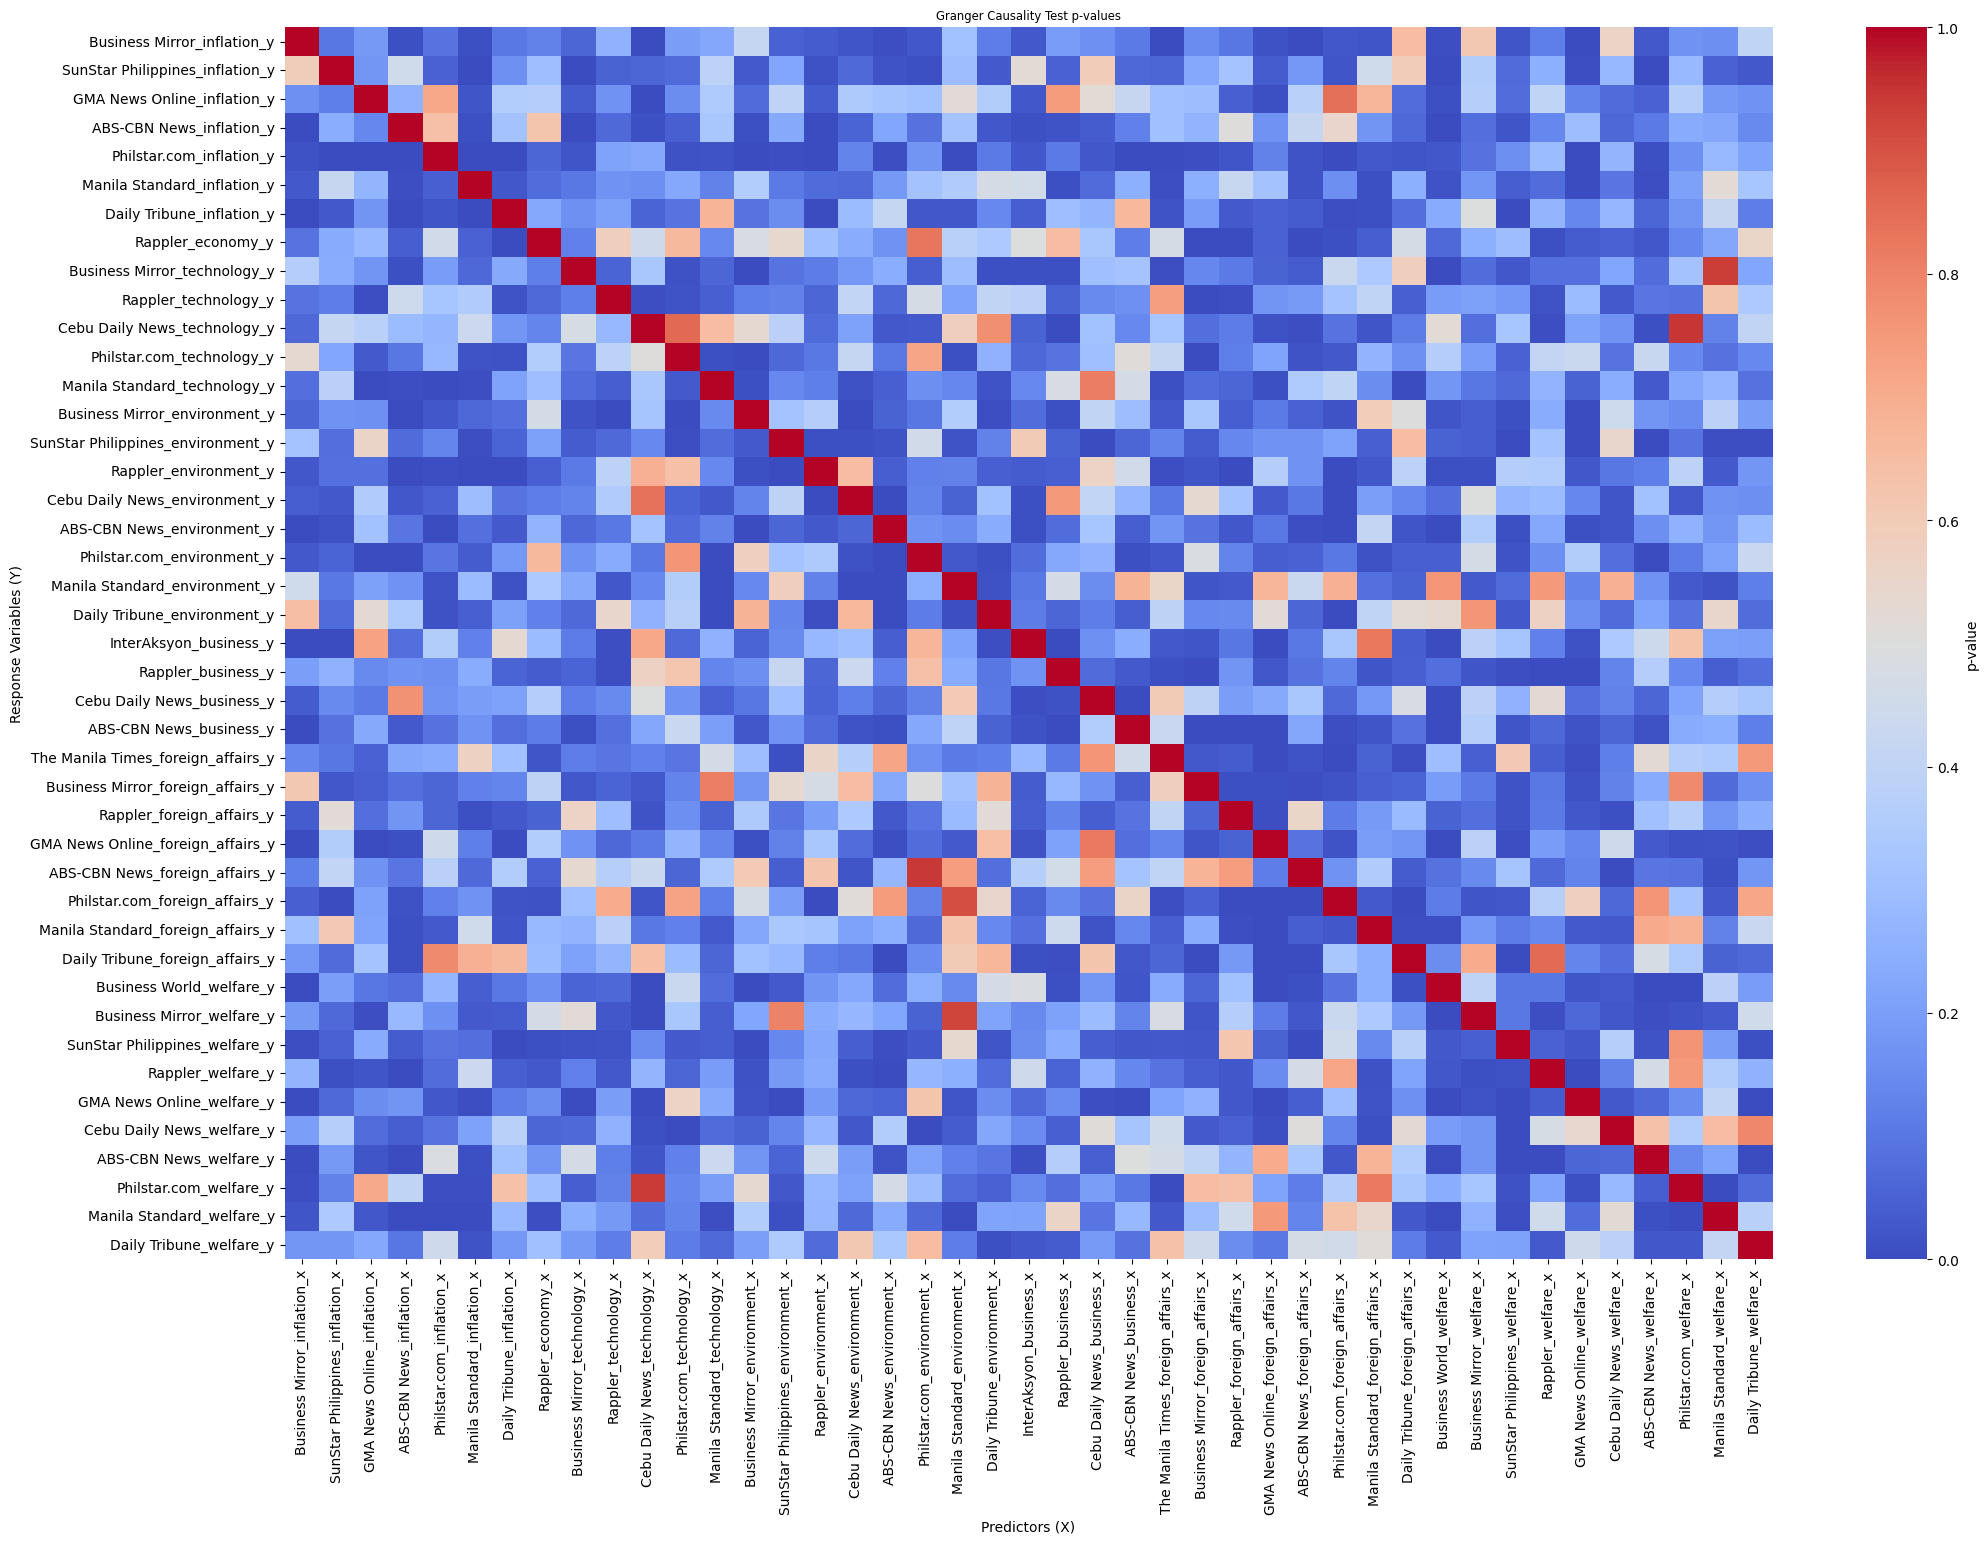

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))
sns.heatmap(granger_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title('Granger Causality Test p-values')
plt.xlabel('Predictors (X)')
plt.ylabel('Response Variables (Y)')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
import numpy as np

# Step 1: Check for stationarity and differencing (Assume this is done with previous code and you have df_differenced)

# Step 2: Test for Cointegration
def johansen_cointegration_test(df, alpha=0.05):
    """Perform Johansen's cointegration test and return results"""
    result = coint_johansen(df, det_order=0, k_ar_diff=3)
    traces = result.lr1
    cvts = result.cvt[:, 1]  # Critical values at alpha level
    test_result = traces > cvts
    return test_result, result.evec

# Step 3: Fit VECM
def fit_vecm(df, lags=0, coint_rank=0):
    """Fit the VECM model to the data"""
    vecm = VECM(df, k_ar_diff=lags, coint_rank=coint_rank)
    vecm_fit = vecm.fit()
    return vecm_fit

# Example usage with your DataFrame
# Assuming your differenced DataFrame is named df_differenced

# Convert differenced list to DataFrame if not already done
df4 = df3.copy()#pd.concat(df2, axis=1)  # Assuming df_differenced is a list of Series

# Standardize the data
df4 = (df4 - df4.mean()) / df4.std()

# Perform Johansen cointegration test
cointegration_test_result, cointegration_vectors = johansen_cointegration_test(df4)

# Check if the series are cointegrated
if any(cointegration_test_result):
    print("The series are cointegrated.")
    print("Cointegration vectors:")
    print(cointegration_vectors)

    # Experiment with different values for lags and cointegration rank
    for lags in range(1, 5):  # Trying lag values from 1 to 4
        for coint_rank in range(1, df_differenced.shape[1]):  # Trying different cointegration ranks
            try:
                vecm_model = fit_vecm(df_differenced, lags=lags, coint_rank=coint_rank)
                print(f"VECM Model Summary with lags={lags} and coint_rank={coint_rank}:")
                print(vecm_model.summary())
                break  # Exit the loop if the model fits successfully
            except np.linalg.LinAlgError:
                print(f"Failed to fit VECM with lags={lags} and coint_rank={coint_rank}")
else:
    print("No cointegration relationship found among the series.")


No cointegration relationship found among the series.


/usr/local/lib/python3.8/site-packages/statsmodels/tsa/vector_ar/vecm.py:648: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn(
